In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

# cv2 CascadeClassifier

In [33]:
# Creating face_cascade and eye_cascade objects
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

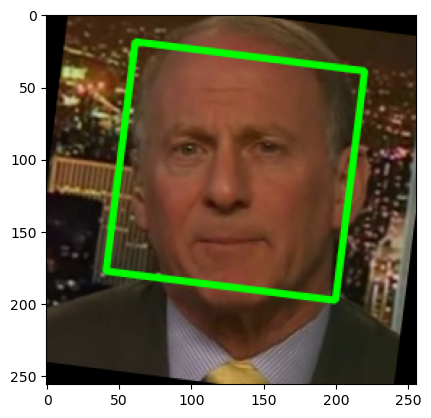

In [38]:
# Guarda el tiempo de inicio
inicio = time.time()

img = cv2.imread('img_lipread_mp4_demo/IMG_000178.jpg')
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces= face_cascade.detectMultiScale(gray, 1.1, 4)
for(x , y,  w,  h) in faces:
  cv2.rectangle(img, (x,y) ,(x+w, y+h), (0,255,0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Creating two regions of interest
roi_gray=gray[y:(y+h), x:(x+w)]
roi_color=img[y:(y+h), x:(x+w)]

# Creating variable eyes
eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)
index=0
# Creating for loop in order to divide one eye from another
for (ex , ey,  ew,  eh) in eyes:
  if index == 0:
    eye_1 = (ex, ey, ew, eh)
  elif index == 1:
    eye_2 = (ex, ey, ew, eh)
# Drawing rectangles around the eyes
#  cv2.rectangle(roi_color, (ex,ey) ,(ex+ew, ey+eh), (0,0,255), 3)
  index = index + 1
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

if eye_1[0] < eye_2[0]:
   left_eye = eye_1
   right_eye = eye_2
else:
   left_eye = eye_2
   right_eye = eye_1

# Calculating coordinates of a central points of the rectangles
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_x = left_eye_center[0] 
left_eye_y = left_eye_center[1]
 
right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
right_eye_x = right_eye_center[0]
right_eye_y = right_eye_center[1]
 
#cv2.circle(roi_color, left_eye_center, 5, (255, 0, 0) , -1)
#cv2.circle(roi_color, right_eye_center, 5, (255, 0, 0) , -1)
#cv2.line(roi_color,right_eye_center, left_eye_center,(0,200,200),3)

if left_eye_y > right_eye_y:
   A = (right_eye_x, left_eye_y)
   # Integer -1 indicates that the image will rotate in the clockwise direction
   direction = -1 
else:
   A = (left_eye_x, right_eye_y)
  # Integer 1 indicates that image will rotate in the counter clockwise  
  # direction
   direction = 1 

# cv2.circle(roi_color, A, 5, (255, 0, 0) , -1)
 
# cv2.line(roi_color,right_eye_center, left_eye_center,(0,200,200),3)
# cv2.line(roi_color,left_eye_center, A,(0,200,200),3)
# cv2.line(roi_color,right_eye_center, A,(0,200,200),3)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

delta_x = right_eye_x - left_eye_x
delta_y = right_eye_y - left_eye_y
angle=np.arctan(delta_y/delta_x)
angle = (angle * 180) / np.pi

#Width and height of the image
h, w = img.shape[:2]
# Calculating a center point of the image
# Integer division "//"" ensures that we receive whole numbers
center = (w // 2, h // 2)
# Defining a matrix M and calling
# cv2.getRotationMatrix2D method
M = cv2.getRotationMatrix2D(center, (angle), 1.0)
# Applying the rotation to our image using the
# cv2.warpAffine method
rotated = cv2.warpAffine(img, M, (w, h))

# Guarda el tiempo de finalización
fin = time.time()

plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))

In [39]:
# Calcula la diferencia de tiempo
tiempo_transcurrido = fin - inicio

print("Tiempo transcurrido:", tiempo_transcurrido, "segundos")

Tiempo transcurrido: 0.03603100776672363 segundos


# dlib shape_predictor

Tiempo transcurrido: 1.5354218482971191 segundos


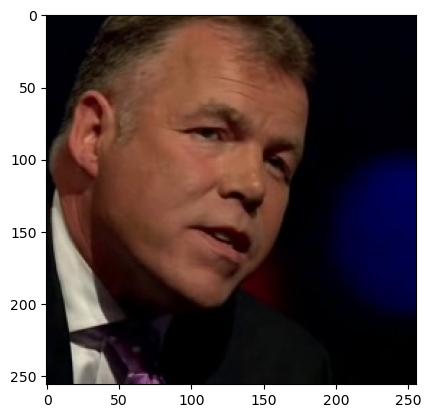

In [330]:
import dlib
import cv2
import numpy as np

# Guarda el tiempo de inicio
inicio = time.time()

def alinear_cara(imagen):
    # Inicializar detector de rostros y predictor de puntos clave
    detector_rostros = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    # Convertir la imagen a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Detectar rostros en la imagen
    rostros = detector_rostros(gris)

    # Si se detecta al menos un rostro
    if len(rostros) > 0:
        for rostro in rostros:
            # Obtener puntos clave de la cara
            puntos_clave = predictor(imagen, rostro)

            # Extraer coordenadas de los ojos izquierdo y derecho
            ojo_izq_x = puntos_clave.part(36).x
            ojo_izq_y = puntos_clave.part(36).y
            ojo_der_x = puntos_clave.part(45).x
            ojo_der_y = puntos_clave.part(45).y

            # Calcular el ángulo de rotación necesario para alinear los ojos horizontalmente
            angulo_rad = np.arctan((ojo_der_y - ojo_izq_y) / (ojo_der_x - ojo_izq_x))
            angulo_grados = np.degrees(angulo_rad)

            # Rotar la imagen para alinear los ojos horizontalmente
            M = cv2.getRotationMatrix2D((ojo_izq_x, ojo_izq_y), angulo_grados, 1.0)
            imagen_alineada = cv2.warpAffine(imagen, M, (imagen.shape[1], imagen.shape[0]))

            return imagen_alineada

    else:
        print("No se detectaron rostros en la imagen.")
        return None

# Cargar la imagen
imagen = cv2.imread('img_lipread_mp4_demo/IMG_000110.jpg')

# Llamar a la función para alinear la cara
imagen_alineada = alinear_cara(imagen)

# Guarda el tiempo de finalización
fin = time.time()

# Calcula la diferencia de tiempo
tiempo_transcurrido = fin - inicio

print("Tiempo transcurrido:", tiempo_transcurrido, "segundos")

# Mostrar la imagen original y la imagen alineada
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))

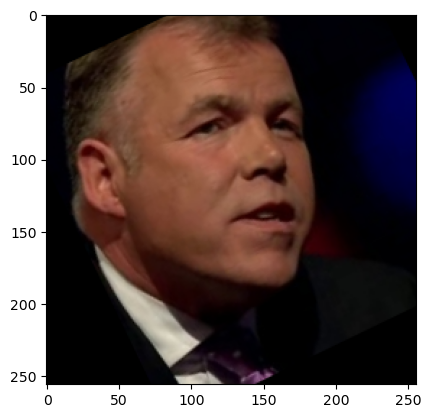

In [331]:
plt.imshow(cv2.cvtColor(imagen_alineada, cv2.COLOR_BGR2RGB))

# Face_Mesh()

In [2]:
import cv2
import mediapipe as mp
import numpy as np
import os
import pandas as pd

mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
index_lips = [61, 76, 62, 78, 
              185, 184, 183, 191, 95, 96, 77, 146, 
              40, 74, 42, 80, 88, 89, 90, 91, 
              39, 73, 41, 81, 178, 179, 180, 181, 
              37, 72, 38, 82, 87, 86, 85, 84,
              0, 11, 12, 13, 14, 15, 16, 17,
              267, 302, 268, 312, 317, 316, 315, 314, 
              269, 303, 271, 311, 402, 403, 404, 405, 
              270, 304, 272, 310, 318, 319, 320, 321, 
              409, 408, 407, 415, 324, 325, 307, 375, 
              308, 292, 306, 291]
index_eyes = [159, 386]

# Indices de los puntos clave de los labios
index_lips = [61, 185, 40, 39, 37, 0, 
              146, 91, 181, 84, 17,
              267, 269, 270, 409, 291,
              314, 405, 321, 375] # Representan el borde de los labios
index_eyes = [33, 263] # Representan el centro del ojo izquierdo

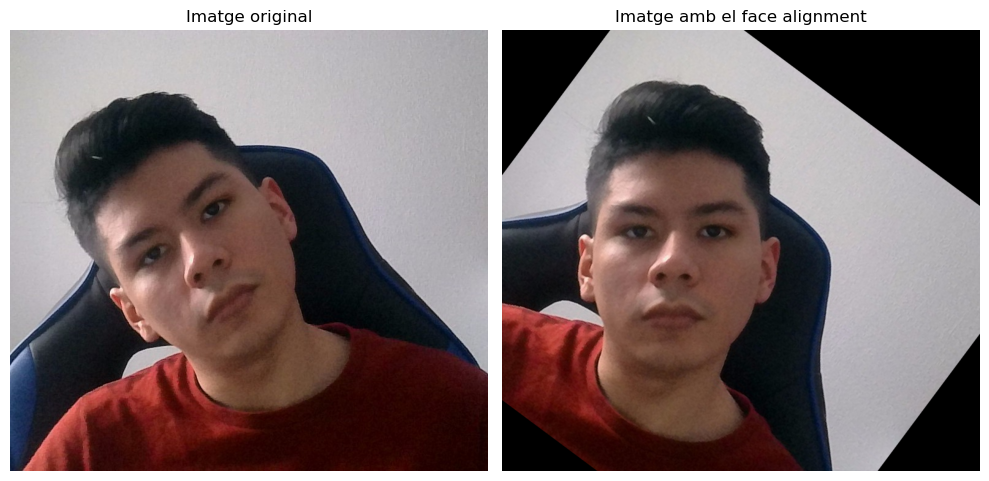

In [6]:
# Guarda el tiempo de inicio
inicio = time.time()

# Función para alinear la cara utilizando Face Mesh
def alinear_cara(image_path):
    # Inicializar el módulo FaceMesh
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

    # Cargar la imagen
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Procesar la imagen con Face Mesh
    results = face_mesh.process(image_rgb)

    # Si se detectan landmarks faciales
    if results.multi_face_landmarks is not None:
        # Obtener los landmarks faciales del primer rostro detectado
        face_landmarks = results.multi_face_landmarks[0]

        # Obtener las coordenadas de los ojos
        left_eye_x = face_landmarks.landmark[33].x * image.shape[1]  # Landmark 33 representa el centro del ojo izquierdo
        left_eye_y = face_landmarks.landmark[33].y * image.shape[0]
        right_eye_x = face_landmarks.landmark[263].x * image.shape[1]  # Landmark 263 representa el centro del ojo derecho
        right_eye_y = face_landmarks.landmark[263].y * image.shape[0]
        
        # Calcular el ángulo de rotación basado en la posición de los ojos
        angle = np.arctan2(right_eye_y - left_eye_y, right_eye_x - left_eye_x) * 180 / np.pi
        # Rotar la imagen
        center = ((left_eye_x + right_eye_x) // 2, (left_eye_y + right_eye_y) // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)             
        aligned_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
        #aligned_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

        return aligned_image
    else:
        return None

# Ejemplo de uso
image_path = 'img_Memoria/Face_alignment_1.jpg'
image_org = cv2.imread(image_path)
aligned_image = alinear_cara(image_path)

# Guarda el tiempo de finalización
fin = time.time()

if aligned_image is not None:
    #plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
    # Crear un subplot con 1 fila y 2 columnas
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Mostrar la primera imagen en el primer subplot
    axes[0].imshow(cv2.cvtColor(image_org, cv2.COLOR_BGR2RGB))
    axes[0].axis('off')  # Ocultar los ejes
    axes[0].set_title('Imatge original')
    
    # Mostrar la segunda imagen en el segundo subplot
    axes[1].imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
    axes[1].axis('off')  # Ocultar los ejes
    axes[1].set_title('Imatge amb el face alignment')
    
    # Mostrar la figura
    plt.tight_layout()
    plt.show()

else:
    print('No se detectaron rostros en la imagen.')


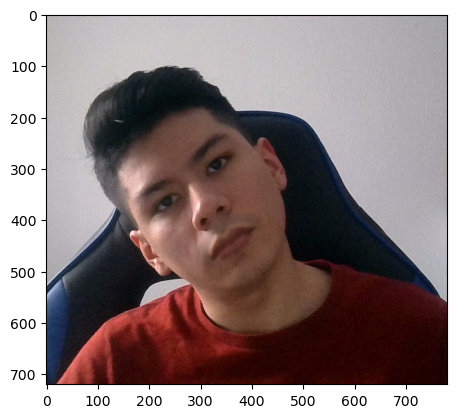

In [41]:
image_path = 'img_Memoria/Face_alignment_1.jpg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [42]:
# Calcula la diferencia de tiempo
tiempo_transcurrido = fin - inicio

print("Tiempo transcurrido:", tiempo_transcurrido, "segundos")

Tiempo transcurrido: 0.05727505683898926 segundos


# Creació de les noves imatges

Cal recalcar que vaig modificar el meu codi perquè no consumeixi molta memòria, ja que al principi sempre se m'emplenava la memòria i no aconseguia crear un nou conjunt d'imatges.

In [6]:
# Función para alinear la cara utilizando Face Mesh
def alinear_cara(image_path):
    # Inicializar el módulo FaceMesh
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

    # Cargar la imagen
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Procesar la imagen con Face Mesh
    results = face_mesh.process(image_rgb)

    # Si se detectan landmarks faciales
    if results.multi_face_landmarks is not None:
        # Obtener los landmarks faciales del primer rostro detectado
        face_landmarks = results.multi_face_landmarks[0]

        # Obtener las coordenadas de los ojos
        left_eye_x = face_landmarks.landmark[33].x * image.shape[1]  # Landmark 33 representa el centro del ojo izquierdo
        left_eye_y = face_landmarks.landmark[33].y * image.shape[0]
        right_eye_x = face_landmarks.landmark[263].x * image.shape[1]  # Landmark 263 representa el centro del ojo derecho
        right_eye_y = face_landmarks.landmark[263].y * image.shape[0]
        
        # Calcular el ángulo de rotación basado en la posición de los ojos
        angle = np.arctan2(right_eye_y - left_eye_y, right_eye_x - left_eye_x) * 180 / np.pi
        # Rotar la imagen
        center = ((left_eye_x + right_eye_x) // 2, (left_eye_y + right_eye_y) // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)             
        aligned_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
        #aligned_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

        return aligned_image
    else:
        return None

In [4]:
import os
import cv2
import numpy as np
import mediapipe as mp

def alinear_cara(image, face_mesh):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image_rgb)

    if results.multi_face_landmarks is not None:
        face_landmarks = results.multi_face_landmarks[0]

        left_eye_x = face_landmarks.landmark[33].x * image.shape[1]
        left_eye_y = face_landmarks.landmark[33].y * image.shape[0]
        right_eye_x = face_landmarks.landmark[263].x * image.shape[1]
        right_eye_y = face_landmarks.landmark[263].y * image.shape[0]
        
        angle = np.arctan2(right_eye_y - left_eye_y, right_eye_x - left_eye_x) * 180 / np.pi
        center = ((left_eye_x + right_eye_x) // 2, (left_eye_y + right_eye_y) // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)             
        aligned_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

        return aligned_image
    else:
        return None

def procesar_imagenes(carpeta_principal, path_destino, inicio_cont):
    mp_face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)
    cont = inicio_cont
    for entrada in os.listdir(carpeta_principal):
        ruta_absoluta = os.path.join(carpeta_principal, entrada)
        image = cv2.imread(ruta_absoluta)
        aligned_image = alinear_cara(image, mp_face_mesh)
        if aligned_image is not None:
            cv2.imwrite(path_destino + 'IMG_%06d.jpg' % cont, aligned_image)
            cont += 1
        else:
            print("No se pudo alinear la cara en la imagen:", entrada)
    return cont

carpeta_principal = 'img_lipread_mp4_demo - copia/'
path_destino = 'img_rotate_lipread_demo/'
inicio_cont = 22856

inicio_cont = procesar_imagenes(carpeta_principal, path_destino, inicio_cont)
